<a href="https://colab.research.google.com/github/Swatijoshi2002/scikitlearn_machinelearning/blob/main/miniproject_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-learn

In [3]:
import numpy as np
import seaborn as sns
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [1]:
from google.colab import files
uploaded=files.upload()


Saving Cleaned train.csv to Cleaned train.csv


In [4]:
import io
data=pd.read_csv(io.BytesIO(uploaded['Cleaned train.csv']))
data.head

<bound method NDFrame.head of         Id  LotFrontage  ...  SaleCondition_Partial  Saleprice
0        1    18.144573  ...                      0     208501
1        2    20.673625  ...                      0     181501
2        3    18.668047  ...                      0     223501
3        4    17.249651  ...                      0     140001
4        5    21.314283  ...                      0     250001
...    ...          ...  ...                    ...        ...
1453  1454    17.611139  ...                      0     175001
1454  1455    21.472480  ...                      0     210001
1455  1456    18.320139  ...                      0     266501
1456  1457    18.668047  ...                      0     142126
1457  1458    19.854050  ...                      0     147501

[1458 rows x 35 columns]>

In [5]:
data.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,18.779714,14.007220,6.093964,4.377809,1971.218107,1984.834019,40.725632,301.299193,1.116203,60.576658,511.828686,6.131390,793.393332,0.081035,8.132964,0.420987,0.040575,1.563786,0.409147,2.866255,0.773832,2.047518,0.541861,1868.549383,1.766118,494.462779,19.802824,7.296612,1.760513,0.103837,0.013717,0.821674,0.084362,180933.919067
std,421.032659,3.624053,1.147738,1.376369,0.758975,30.193754,20.641760,17.501338,254.299780,3.182250,32.731398,158.548796,0.239237,265.787563,0.604809,0.411543,0.513673,0.167022,0.549891,0.540021,0.816323,0.109413,0.224940,0.557234,453.979431,0.747104,180.046096,23.183077,7.624854,4.437524,0.809247,0.116355,0.382919,0.278026,79495.055285
min,1.000000,8.726308,10.003398,1.000000,0.926401,1872.000000,1950.000000,0.804230,1.660007,0.000000,0.000000,66.745939,5.203416,123.953448,0.000000,6.358975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.114642,0.000000,0.000000,0.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34901.000000
25%,365.250000,17.249651,13.582679,5.000000,3.991517,1954.000000,1967.000000,22.003135,111.088921,0.000000,38.151075,403.428793,5.962001,665.141633,0.000000,7.836160,0.000000,0.000000,1.000000,0.000000,2.000000,0.750957,1.834659,0.000000,1958.000000,1.000000,389.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,129926.000000
50%,729.500000,19.011798,14.088509,6.000000,3.991517,1972.500000,1994.000000,54.598150,162.883107,0.000000,60.231714,480.412438,6.120994,665.141633,0.000000,8.157270,0.000000,0.000000,2.000000,0.000000,3.000000,0.750957,1.996577,0.903334,1977.000000,2.000000,479.500000,0.000000,7.352049,0.000000,0.000000,0.000000,1.000000,0.000000,163001.000000
75%,1093.750000,20.673625,14.546361,7.000000,4.679501,2000.000000,2004.000000,54.598150,665.141633,0.000000,82.317775,608.206800,6.308375,869.944797,0.000000,8.401020,0.993440,0.000000,2.000000,1.068837,3.000000,0.750957,2.137369,0.903334,2001.000000,2.000000,576.000000,38.723951,12.788488,0.000000,0.000000,0.000000,1.000000,0.000000,214001.000000
max,1458.000000,47.771473,22.152569,10.000000,6.637669,2010.000000,2010.000000,54.598150,665.141633,14.266950,153.865931,1344.982594,6.933132,2550.139806,5.028404,9.577199,2.956972,1.143642,3.000000,2.237197,8.000000,1.630565,2.806843,2.404976,2010.000000,4.000000,1390.000000,110.738938,36.066711,20.957499,7.817020,1.000000,1.000000,1.000000,755001.000000


In [6]:
correalation=data.corr()

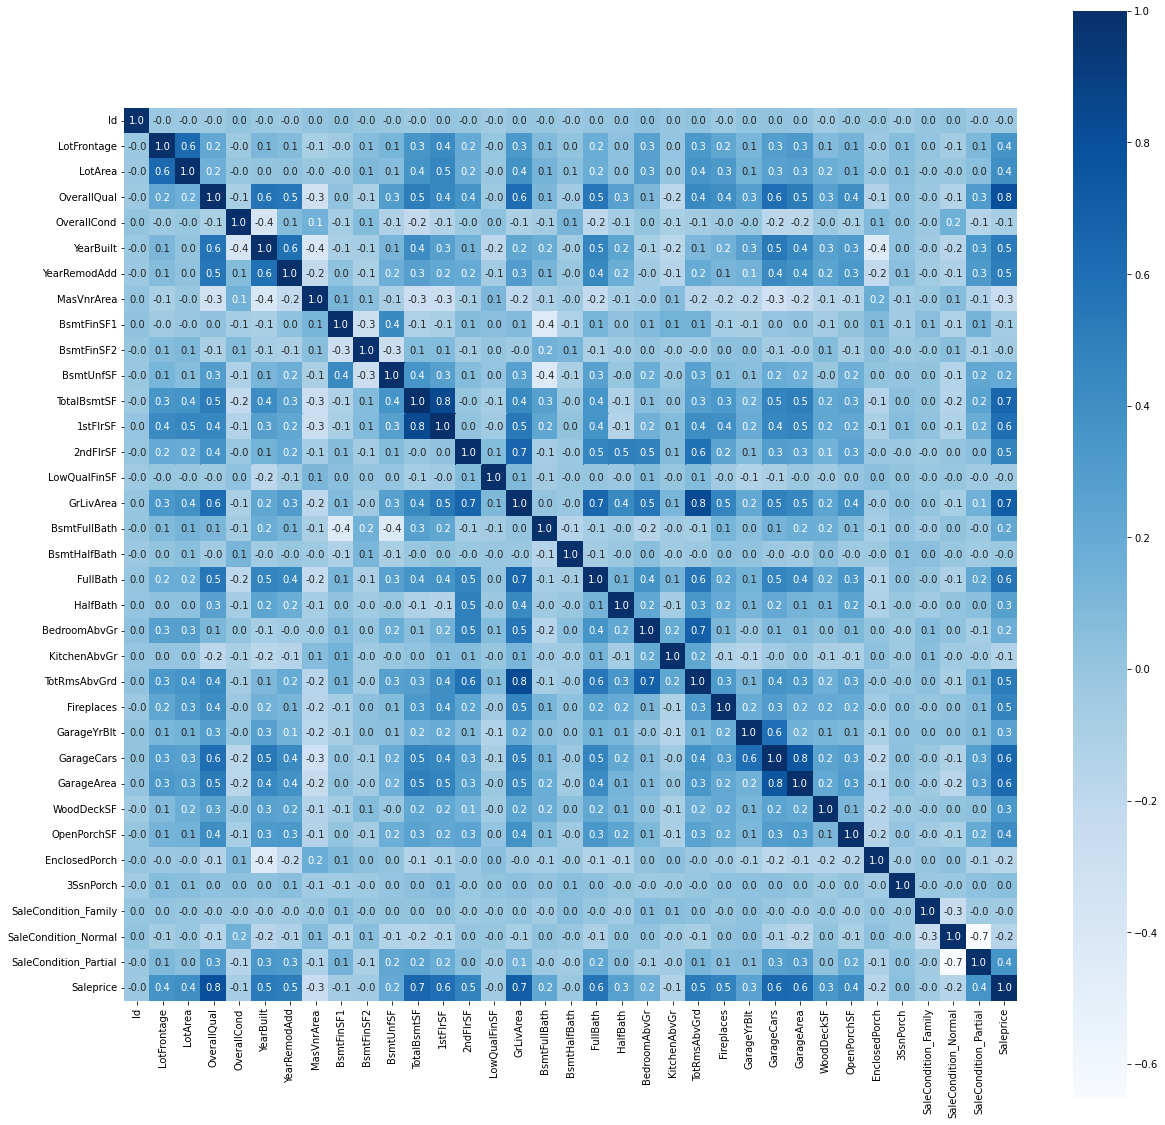

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(correalation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Blues')

In [8]:
X=data.drop('Saleprice',axis=1)
Y=data['Saleprice']

In [9]:
model=XGBRegressor();
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
model.fit(X_train,Y_train)
prediction=model.predict(X_train)
#r square error
error1=metrics.r2_score(Y_train,prediction)
print("r2 error==>",error1) #gives the error made by our model
e=metrics.mean_absolute_error(Y_train,prediction)
print(e)

[07:57:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 error==> 0.9649914019525294
10625.706059712693


Text(0.5, 1.0, 'graph for training data')

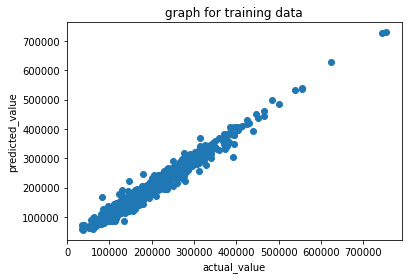

In [10]:
plt.scatter(Y_train,prediction)
plt.xlabel("actual_value")
plt.ylabel("predicted_value")
plt.title("graph for training data")

In [11]:
predictions=model.predict(X_test)
#r square error
error=metrics.r2_score(Y_test,predictions)
print("r2 error==>",error) #gives the error made by our model
et=metrics.mean_absolute_error(Y_test,predictions)
print(et)

r2 error==> 0.8972254736291029
17101.12687285959


Text(0.5, 1.0, 'graph for testing data')

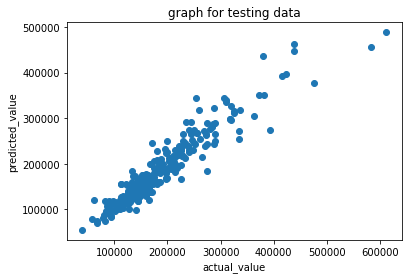

In [12]:
plt.scatter(Y_test,predictions)
plt.xlabel("actual_value")
plt.ylabel("predicted_value")
plt.title("graph for testing data")

In [15]:
num=input()
num=int(num)
print("precidiction on random data",model.predict(X)[num])
print("accuracy on random data",Y[num])

200
precidiction on random data 142058.47
accuracy on random data 140001
